In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>")) #作業領域を広くする

In [2]:
#kaggle課題　car fuel consumption ツールのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression,SGDClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from pandas.tools.plotting import scatter_matrix
from sklearn.metrics import classification_report, accuracy_score #予測結果の識別率を算出
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画
# 回帰問題における性能評価に関する関数ラベルを予測
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix 
import io
import datetime
from datetime import datetime as dt

In [3]:
df = pd.read_csv("measurements.csv")
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
df.notnull().sum() 

distance         388
consume          388
speed            388
temp_inside      376
temp_outside     388
specials          93
gas_type         388
AC               388
rain             388
sun              388
refill liters     13
refill gas        13
dtype: int64

In [5]:
df['specials'].value_counts().to_dict()

{'AC': 6,
 'AC Sun': 1,
 'AC rain': 9,
 'AC snow': 1,
 'AC sun': 1,
 'ac': 8,
 'ac rain': 1,
 'half rain half sun': 1,
 'rain': 32,
 'snow': 3,
 'sun': 27,
 'sun ac': 3}

In [6]:
#「specials」以外の変数でデータフレーム再作成
df2 = pd.read_csv("measurements.csv")[['distance','consume','speed', 'temp_inside', 'temp_outside','gas_type', 'AC',
                                                      'rain','sun','refill liters','refill gas']]
df2.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,E10,0,0,0,NaN,NaN


In [7]:
df3=df2.dropna(subset=['refill liters'])
df3.head(13)
#以下の結果から「gas_type」と「refill gas」は同種であり、混在がないと分かる。
#またrefill litersとconsumeは水準が1桁違うので、refill litersはconsumeに影響しないと考える。

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,E10,0,0,0,45,E10
44,"5,4","3,3",32,"21,5",7,SP98,0,0,0,"37,6",SP98
82,"10,5","3,6",42,20,10,SP98,0,0,0,"37,7",SP98
106,"162,7","5,5",75,23,1,SP98,0,0,0,45,SP98
139,"16,1","5,4",24,"21,5",7,E10,0,1,0,38,E10
171,"44,4","4,8",38,"21,5",8,E10,0,0,0,"38,3",E10
191,"43,7","4,7",44,22,9,SP98,0,1,0,10,SP98
192,"12,1","4,2",43,22,4,SP98,0,0,0,39,SP98
234,19,"4,5",29,"22,5",10,E10,0,0,0,39,E10
274,"25,7","4,9",50,22,10,SP98,0,1,0,41,SP98


In [8]:
df['gas_type'].value_counts().to_dict() #gas_typeの数を確認する

{'E10': 160, 'SP98': 228}

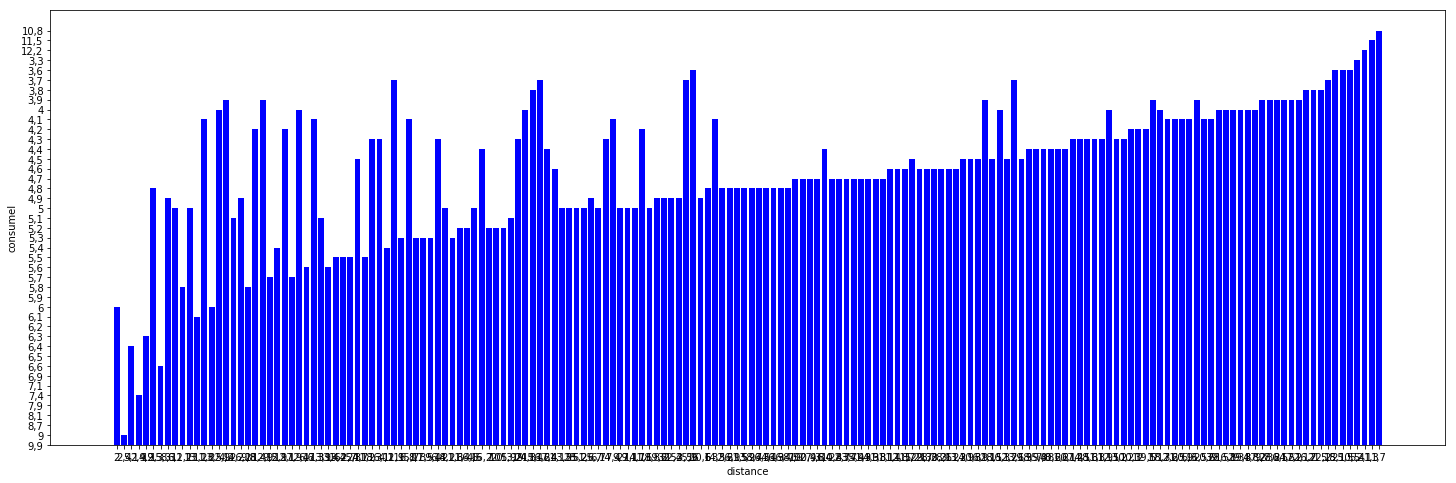

In [9]:
#consumeとdistanceの関係を確認する
df_S=df.sort_values(by='consume',ascending=False)
plt.figure(figsize=(25,8))
y=df_S["consume"]
x=df_S["distance"]
plt.bar(x,y,color="b")
plt.xlabel("distance")
plt.ylabel("consumel")
plt.show()

In [10]:
#SP98のデータフレーム
df_SP=df.drop(df.index[df["gas_type"] =='E10'], axis=0) 
df_SP.head(3)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
44,"5,4","3,3",32,"21,5",7,NaN,SP98,0,0,0,"37,6",SP98
45,2,"9,9",21,"21,5",4,NaN,SP98,0,0,0,NaN,NaN
46,"14,2","5,1",32,"21,5",7,NaN,SP98,0,0,0,NaN,NaN


In [11]:
#SP10のデータフレーム
df_E=df.drop(df.index[df["gas_type"] =='SP98'], axis=0) 
df_E.head(3)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN


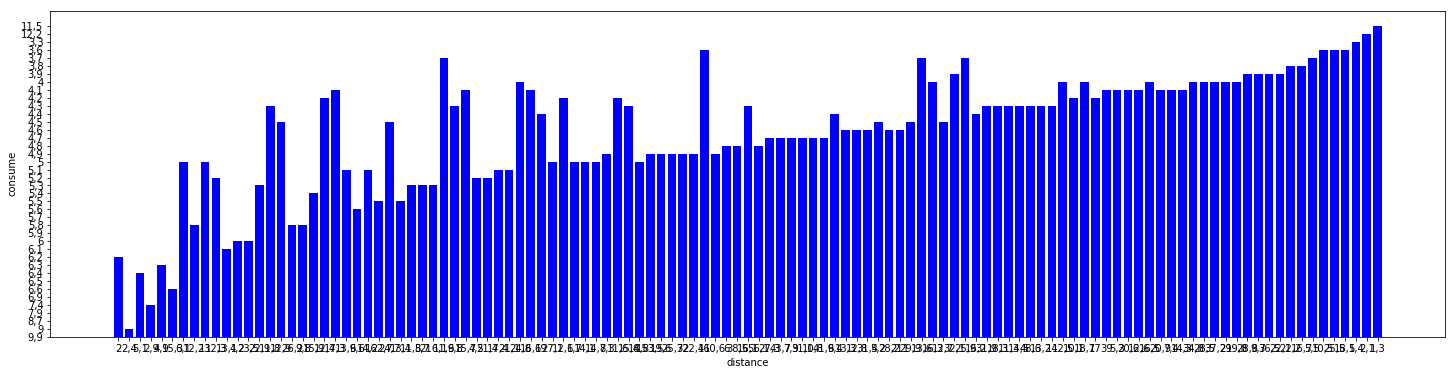

In [12]:
#SP98のconsumeとdistanceの関係を確認する
df_S_SP=df_SP.sort_values(by='consume',ascending=False)
plt.figure(figsize=(25,6))
y=df_S_SP["consume"]
x=df_S_SP["distance"]
plt.bar(x,y,color="b")
plt.xlabel("distance")
plt.ylabel("consume")
plt.show()

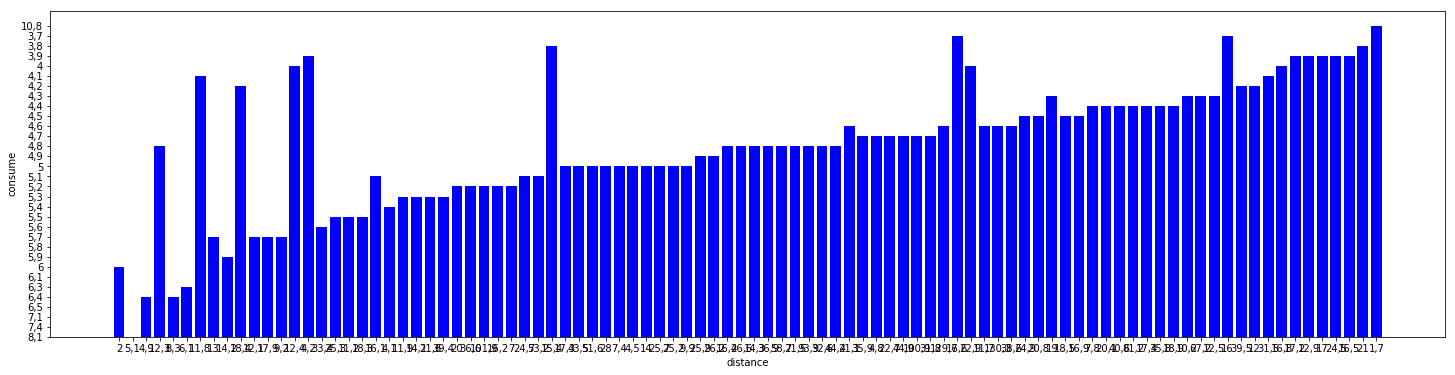

In [13]:
#E10のconsumeとdistanceの関係を確認する
df_S_E=df_E.sort_values(by='consume',ascending=False)
plt.figure(figsize=(25,6))
y=df_S_E["consume"]
x=df_S_E["distance"]
plt.bar(x,y,color="b")
plt.xlabel("distance")
plt.ylabel("consume")
plt.show()

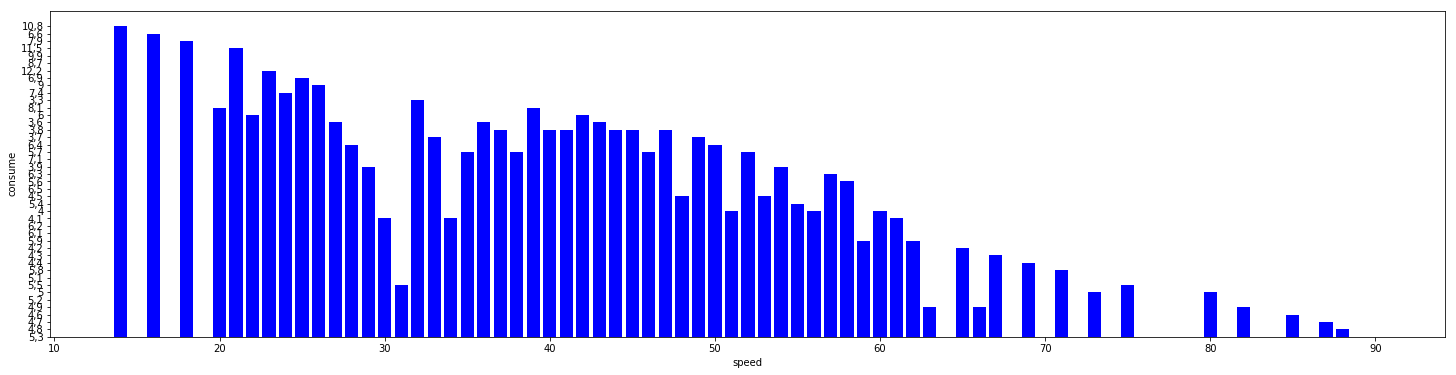

In [14]:
#全体のspeedとconsumeの関係を確認する
df_speed=df2.sort_values(by='speed',ascending=False)
plt.figure(figsize=(25,6))
y=df_speed["consume"]
x=df_speed["speed"]
plt.bar(x,y,color="b")
plt.xlabel("speed")
plt.ylabel("consume")
plt.show()

In [15]:
df2.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [16]:
df2['distance']=df2['distance'].str.replace(",",".").astype(float)
df2['consume']=df2['consume'].str.replace(",",".").astype(float)
df2['temp_inside']=df2['temp_inside'].str.replace(",",".").astype(float)

In [17]:
df3=pd.get_dummies(df2['refill gas'])
df2=pd.concat([df2,df3],axis=1)
df2.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,E10,SP98
0,28.0,5.0,26,21.5,12,E10,0,0,0,45,E10,1,0
1,12.0,4.2,30,21.5,13,E10,0,0,0,NaN,NaN,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0,NaN,NaN,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0,NaN,NaN,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0,NaN,NaN,0,0


In [18]:
#temp_insideの空白値等を平均値で埋める
value=df2['temp_inside'].mean()
df2['temp_inside']=df2['temp_inside'].replace([""],value)
df2['temp_inside']=df2['temp_inside'].replace(["nan"],value)
df2.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,E10,SP98
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,0.012887,0.020619
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,0.112931,0.142287
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df2['temp_inside'][93,95,97,98,99,100,102,201,203,261,267,268]=value

C:\Users\nqf49\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\nqf49\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
#「nan」が置き換わったことの確認
df2['temp_inside'][93]

21.929521276595743

In [21]:
#平均値で置換して良かったか分布を確認
df2['temp_inside'].describe()

count    388.000000
mean      21.929521
std        0.994666
min       19.000000
25%       21.500000
50%       22.000000
75%       22.500000
max       25.500000
Name: temp_inside, dtype: float64

In [22]:
df2['temp_outside'].describe()

count    388.000000
mean      11.358247
std        6.991542
min       -5.000000
25%        7.000000
50%       10.000000
75%       16.000000
max       31.000000
Name: temp_outside, dtype: float64

In [23]:
df2['temp_inside'][93]=df2['temp_inside'][92]
df2['temp_inside'][95]=df2['temp_inside'][94]
df2['temp_inside'][97,98,99,100]=df2['temp_inside'][96]
df2['temp_inside'][102]=df2['temp_inside'][101]
df2['temp_inside'][201]=df2['temp_inside'][200]
df2['temp_inside'][203]=df2['temp_inside'][202]
df2['temp_inside'][261]=df2['temp_inside'][260]
df2['temp_inside'][267,268]=df2['temp_inside'][266]

C:\Users\nqf49\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\nqf49\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\nqf49\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nqf49\Anac

In [24]:
df2['temp_inside'].describe()

count    388.000000
mean      21.890464
std        1.035038
min       19.000000
25%       21.500000
50%       22.000000
75%       22.500000
max       25.500000
Name: temp_inside, dtype: float64

In [25]:
#室内温度と室外温度の絶対値を新たな説明変数とし、室内温度と室外温度を除外する
df2['temp']=np.abs(df2['temp_inside']-df2['temp_outside'])
df2=df2.drop(['temp_inside','temp_outside'],axis=1)
df2.head()

,distance,consume,speed,gas_type,AC,rain,sun,refill liters,refill gas,E10,SP98,temp
0,28.0,5.0,26,E10,0,0,0,45,E10,1,0,9.5
1,12.0,4.2,30,E10,0,0,0,NaN,NaN,0,0,8.5
2,11.2,5.5,38,E10,0,0,0,NaN,NaN,0,0,6.5
3,12.9,3.9,36,E10,0,0,0,NaN,NaN,0,0,7.5
4,18.5,4.5,46,E10,0,0,0,NaN,NaN,0,0,6.5


In [26]:
#相関係数を算出
df2.corr()

,distance,consume,speed,AC,rain,sun,E10,SP98,temp
distance,1.000000,-0.128967,0.562299,-0.025738,-0.019791,0.081120,0.026079,0.106134,-0.101858
consume,-0.128967,1.000000,-0.227866,0.096591,0.248118,-0.170667,-0.025731,-0.079080,0.316674
speed,0.562299,-0.227866,1.000000,-0.035408,0.009489,0.081618,-0.073428,0.046177,-0.022754
AC,-0.025738,0.096591,-0.035408,1.000000,0.242915,0.088598,-0.033075,-0.042002,-0.069744
rain,-0.019791,0.248118,0.009489,0.242915,1.000000,-0.112650,0.026474,0.055653,0.185662
sun,0.081120,-0.170667,0.081618,0.088598,-0.112650,1.000000,-0.034256,-0.043501,-0.294890
E10,0.026079,-0.025731,-0.073428,-0.033075,0.026474,-0.034256,1.000000,-0.016578,-0.001406
SP98,0.106134,-0.079080,0.046177,-0.042002,0.055653,-0.043501,-0.016578,1.000000,0.037579
temp,-0.101858,0.316674,-0.022754,-0.069744,0.185662,-0.294890,-0.001406,0.037579,1.000000


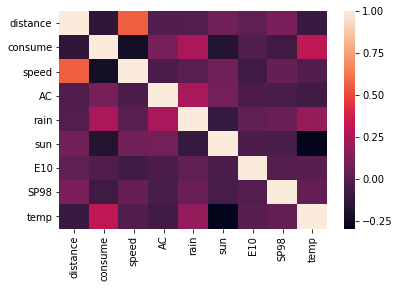

In [27]:
#相関係数をヒートマップにして可視化
sns.heatmap(df2.corr())
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000166F2950908>,
      dtype=object)

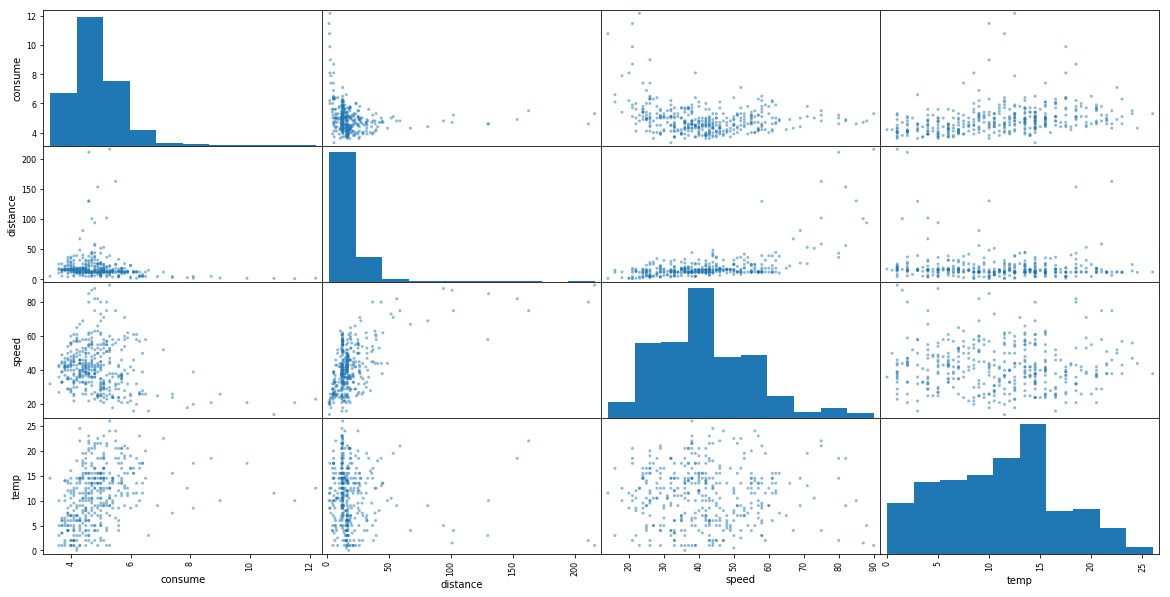

In [28]:
# 散布図行列を書いてみる
df10=df2[["consume","distance","speed","temp"]]
pd.plotting.scatter_matrix(df10,figsize=(20,10)) #数字または数字化した要素での散布図の作成

In [29]:
#全てのデータで回帰
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 回帰
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("決定係数=%s"%regr.score(X_test,y_test))
print("MSE=%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE=%s"%round(mae,3) )

決定係数=0.07670700421039878
MSE=0.635
RMSE=0.797
MAE=0.65


In [30]:
df11=df2[["distance","speed","temp","rain","sun","SP98"]]
df11.corr()

,distance,speed,temp,rain,sun,SP98
distance,1.000000,0.562299,-0.101858,-0.019791,0.081120,0.106134
speed,0.562299,1.000000,-0.022754,0.009489,0.081618,0.046177
temp,-0.101858,-0.022754,1.000000,0.185662,-0.294890,0.037579
rain,-0.019791,0.009489,0.185662,1.000000,-0.112650,0.055653
sun,0.081120,0.081618,-0.294890,-0.112650,1.000000,-0.043501
SP98,0.106134,0.046177,0.037579,0.055653,-0.043501,1.000000


In [31]:
#consumeと相関の高いデータのうち、相互に相関が高い変数を除外して回帰　
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type","sun","distance"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 回帰
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("決定係数=%s"%regr.score(X_test,y_test))
print("MSE=%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE=%s"%round(mae,3) )

決定係数=0.0841335091713391
MSE=0.63
RMSE=0.794
MAE=0.647


In [32]:
#consumeと相関の高いデータのみで回帰、説明変数間の相関は考慮せず（"AC","E10"を最初の回帰の説明変数からはずす）
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type","AC","E10"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 回帰
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("決定係数=%s"%regr.score(X_test,y_test))
print("MSE=%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE=%s"%round(mae,3) )

決定係数=0.06904777209247681
MSE=0.64
RMSE=0.8
MAE=0.652


In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [34]:
#全てのデータで多項式回帰
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 回帰
regr = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())])

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

#print("テストデータの精度 =", regr.score(X_test, y_test))
print("決定係数=%s"%regr.score(X_test, y_test))
print("MSE=%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE=%s"%round(mae,3) )

決定係数=-0.9876898932503078
MSE=1.367
RMSE=1.169
MAE=0.682


In [35]:
#consumeと相関の高いデータのうち、相互に相関が高い変数を除外して回帰　
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type","sun","distance"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 回帰
regr = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())])

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("決定係数=%s"%regr.score(X_test, y_test))
print("MSE=%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE=%s"%round(mae,3) )

決定係数=0.24283947819463325
MSE=0.521
RMSE=0.722
MAE=0.561


In [36]:
from IPython.display import display
from sklearn.preprocessing import StandardScaler, MinMaxScaler

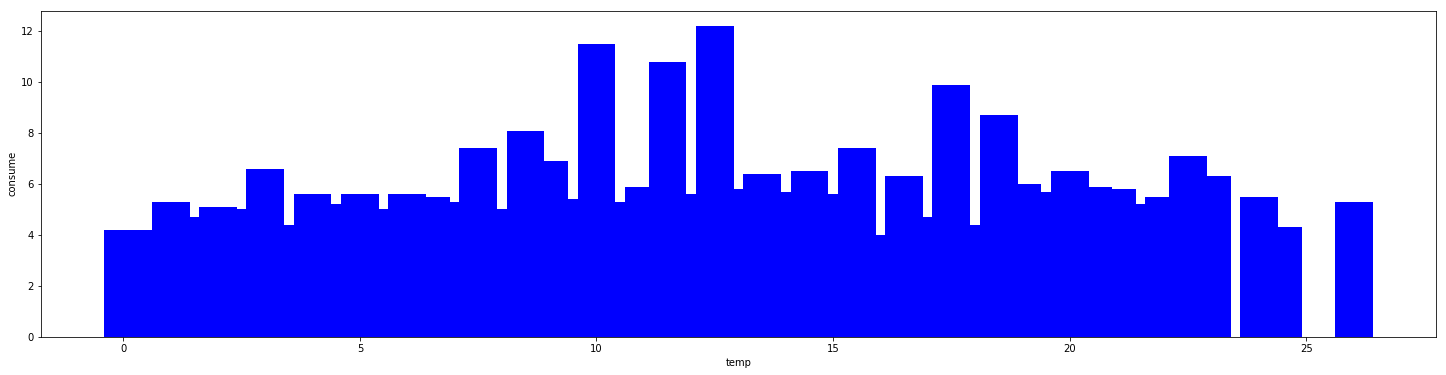

In [37]:
#全体のtempとconsumeの関係を確認する
df_temp=df2.sort_values(by='temp',ascending=False)
plt.figure(figsize=(25,6))
y=df_temp["consume"]
x=df_temp["temp"]
plt.bar(x,y,color="b")
plt.xlabel("temp")
plt.ylabel("consume")
plt.show()

In [38]:
#晴れている日の数を確認
df2['sun'].value_counts().to_dict()

{0: 356, 1: 32}

In [39]:
#sunの燃費の平均を算出し、「晴れていない日」「晴れている日」の燃費を比較
df_consume=df2.groupby(["sun"]).sum()["consume"]
df_consume_n=df2["sun"].value_counts()
dm_average=df_consume/df_consume_n
dm_average.sort_values(ascending=False)
#sunの日は燃費が若干良い

sun
0    4.965169
1    4.325000
dtype: float64

In [40]:
#gas_typeの数を再確認
df2['gas_type'].value_counts().to_dict()

{'E10': 160, 'SP98': 228}

In [41]:
#gas_typeの燃費の平均を算出し、各typeの燃費を比較
df_consume=df2.groupby(["gas_type"]).sum()["consume"]
df_consume_n=df2["gas_type"].value_counts()
dm_average=df_consume/df_consume_n
dm_average.sort_values(ascending=False)
#gas_typeの燃費の差はほとんどない

E10     4.931250
SP98    4.899123
dtype: float64

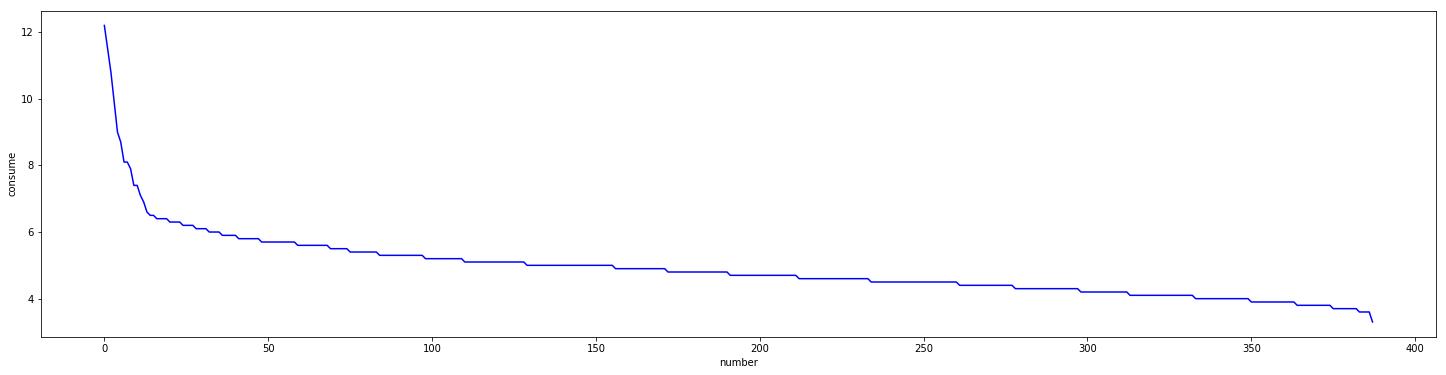

In [42]:
#consumeの分布を確認する
df_consume=df2.sort_values(by='consume',ascending=False)
plt.figure(figsize=(25,6))
y=df_consume["consume"]
x = np.linspace(0, 387, 388)
plt.plot(x,y,color="b")
plt.xlabel("number")
plt.ylabel("consume")
plt.show()

In [43]:
a=np.array(df2['consume'])
df2['consume']=np.log1p(a)
df2.head()

,distance,consume,speed,gas_type,AC,rain,sun,refill liters,refill gas,E10,SP98,temp
0,28.0,1.791759,26,E10,0,0,0,45,E10,1,0,9.5
1,12.0,1.648659,30,E10,0,0,0,NaN,NaN,0,0,8.5
2,11.2,1.871802,38,E10,0,0,0,NaN,NaN,0,0,6.5
3,12.9,1.589235,36,E10,0,0,0,NaN,NaN,0,0,7.5
4,18.5,1.704748,46,E10,0,0,0,NaN,NaN,0,0,6.5


In [44]:
#consumeと相関の高いデータのうち、相互に相関が高い変数を除外して回帰　
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type","sun","distance"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 回帰
regr = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())])

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("決定係数=%s"%regr.score(X_test, y_test))
print("MSE=%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE=%s"%round(mae,3) )

決定係数=0.20396682162129776
MSE=0.015
RMSE=0.123
MAE=0.099


In [45]:
from sklearn.model_selection import KFold # 交差検証法に関する関数
from sklearn.metrics import mean_absolute_error # 回帰問題における性能評価に関する関数

#consumeと相関の高いデータのうち、相互に相関が高い変数を除外して回帰　
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type","sun","distance"],axis=1).values

n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_mae = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ

# 学習用データを使って回帰
    regr = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())])

    regr.fit(X_train, y_train)
    
    # テストデータに対する予測を実行
    y_pred = regr.predict(X_test)    
    
    # テストデータに対するMAEを計算
    mae = mean_absolute_error(y_test, y_pred)
    print("Fold %s"%split_num)
    print("MAE = %s"%round(mae, 3))
    print()
    
    cross_valid_mae += mae #後で平均を取るためにMAEを加算
    split_num += 1

# MAEの平均値を最終的な汎化誤差値とする
final_mae = cross_valid_mae / n_split
print("Cross Validation MAE = %s"%round(final_mae, 3))

Fold 1
MAE = 0.112

Fold 2
MAE = 0.105

Fold 3
MAE = 0.104

Fold 4
MAE = 0.088

Fold 5
MAE = 0.099

Cross Validation MAE = 0.102


In [46]:
# 標準化。distance、speed、tempを標準化する。
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
df2["distance"]=stdsc.fit_transform(df2[["distance"]].values)
df2["speed"]=stdsc.fit_transform(df2[["speed"]].values)
df2["temp"]=stdsc.fit_transform(df2[["temp"]].values)
df2.head()

C:\Users\nqf49\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\nqf49\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,distance,consume,speed,gas_type,AC,rain,sun,refill liters,refill gas,E10,SP98,temp
0,0.368714,1.791759,-1.172804,E10,0,0,0,45,E10,1,0,-0.272760
1,-0.338044,1.648659,-0.878274,E10,0,0,0,NaN,NaN,0,0,-0.446395
2,-0.373381,1.871802,-0.289216,E10,0,0,0,NaN,NaN,0,0,-0.793666
3,-0.298288,1.589235,-0.436480,E10,0,0,0,NaN,NaN,0,0,-0.620031
4,-0.050923,1.704748,0.299843,E10,0,0,0,NaN,NaN,0,0,-0.793666


In [47]:
#consumeと相関の高いデータのうち、相互に相関が高い変数を除外して回帰　
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type","sun","distance"],axis=1).values

n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_mae = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ

# 学習用データを使って回帰
    regr = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())])

    regr.fit(X_train, y_train)
    
    # テストデータに対する予測を実行
    y_pred = regr.predict(X_test)    
    
    # テストデータに対するMAEを計算
    mae = mean_absolute_error(y_test, y_pred)
    print("Fold %s"%split_num)
    print("MAE = %s"%round(mae, 3))
    print()
    
    cross_valid_mae += mae #後で平均を取るためにMAEを加算
    split_num += 1

# MAEの平均値を最終的な汎化誤差値とする
final_mae = cross_valid_mae / n_split
print("Cross Validation MAE = %s"%round(final_mae, 3))

Fold 1
MAE = 0.112

Fold 2
MAE = 0.105

Fold 3
MAE = 0.104

Fold 4
MAE = 0.088

Fold 5
MAE = 0.099

Cross Validation MAE = 0.102


In [48]:
df2.head()#データフレームの変数を確認するため表示

,distance,consume,speed,gas_type,AC,rain,sun,refill liters,refill gas,E10,SP98,temp
0,0.368714,1.791759,-1.172804,E10,0,0,0,45,E10,1,0,-0.272760
1,-0.338044,1.648659,-0.878274,E10,0,0,0,NaN,NaN,0,0,-0.446395
2,-0.373381,1.871802,-0.289216,E10,0,0,0,NaN,NaN,0,0,-0.793666
3,-0.298288,1.589235,-0.436480,E10,0,0,0,NaN,NaN,0,0,-0.620031
4,-0.050923,1.704748,0.299843,E10,0,0,0,NaN,NaN,0,0,-0.793666


In [49]:
#「sun,temp」の白色化
data1=df2.drop(["consume","distance","speed","gas_type","AC","rain","refill liters","refill gas","E10","SP98"],axis=1).values
cov = np.cov(data1, rowvar=0) # 分散・共分散を求める
_, S = np.linalg.eig(cov)           # 分散共分散行列の固有ベクトルを用いて
data1_decorr = np.dot(S.T, data1.T).T #データを無相関化

In [50]:
#交差検証法にあたり、「sun,temp」の白色化したもの、およびdistanceとspeedのうちspeedを採用
y=df2['consume'].values
df20=df2.drop(["distance","consume","gas_type","refill liters","refill gas","sun","temp"],axis=1)
X=pd.concat([df20,pd.DataFrame(data1_decorr)],axis=1).values

n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_mae = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ

# 学習用データを使って回帰
    regr = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())])

    regr.fit(X_train, y_train)
    
    # テストデータに対する予測を実行
    y_pred = regr.predict(X_test)    
    
    # テストデータに対するMAEを計算
    mae = mean_absolute_error(y_test, y_pred)
    print("Fold %s"%split_num)
    print("MAE = %s"%round(mae, 3))
    print()
    
    cross_valid_mae += mae #後で平均を取るためにMAEを加算
    split_num += 1

# MAEの平均値を最終的な汎化誤差値とする
final_mae = cross_valid_mae / n_split
print("Cross Validation MAE = %s"%round(final_mae, 3))

Fold 1
MAE = 0.112

Fold 2
MAE = 0.107

Fold 3
MAE = 0.106

Fold 4
MAE = 0.091

Fold 5
MAE = 0.111

Cross Validation MAE = 0.105


In [51]:
#「distance,speed」の白色化
data2=df2.drop(["consume","sun","temp","gas_type","AC","rain","refill liters","refill gas","E10","SP98"],axis=1).values
cov = np.cov(data2, rowvar=0) # 分散・共分散を求める
_, S = np.linalg.eig(cov)           # 分散共分散行列の固有ベクトルを用いて
data2_decorr = np.dot(S.T, data2.T).T #データを無相関化

In [52]:
#交差検証法にあたり、白色化した「sun,temp」、「distance,speed」を全て採用
y=df2['consume'].values
df30=df2.drop(["distance","speed","consume","gas_type","refill liters","refill gas","sun","temp"],axis=1)
X=pd.concat([df20,df30,pd.DataFrame(data1_decorr)],axis=1).values

n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_mae = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ

# 学習用データを使って回帰
    regr = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())])

    regr.fit(X_train, y_train)
    
    # テストデータに対する予測を実行
    y_pred = regr.predict(X_test)    
    
    # テストデータに対するMAEを計算
    mae = mean_absolute_error(y_test, y_pred)
    print("Fold %s"%split_num)
    print("MAE = %s"%round(mae, 3))
    print()
    
    cross_valid_mae += mae #後で平均を取るためにMAEを加算
    split_num += 1

# MAEの平均値を最終的な汎化誤差値とする
final_mae = cross_valid_mae / n_split
print("Cross Validation MAE = %s"%round(final_mae, 3))

Fold 1
MAE = 0.112

Fold 2
MAE = 0.107

Fold 3
MAE = 0.106

Fold 4
MAE = 0.091

Fold 5
MAE = 0.111

Cross Validation MAE = 0.105


In [53]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [54]:
#consumeと相関の高いデータのうち、相互に相関が高い変数を除外して回帰(白色化する前の性能が良かった変数を選択)
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type","sun","distance"],axis=1).values

#交差検証データのジェネレータ
def gen_cv():
    m_train = np.floor(len(y)*0.8).astype(int)
    train_idx = np.arange(m_train)
    test_idx = np.arange(m_train, len(y))
    yield (train_idx, test_idx)
    
# ハイパーパラメータのチューニング
params_cnt = 10
params = {"C":np.logspace(0,2,params_cnt), "epsilon":np.logspace(-1,1,params_cnt)}
gridsearch = GridSearchCV(SVR(), params, cv=gen_cv(), scoring="r2", return_train_score=True)
gridsearch.fit(X, y)

C:\Users\nqf49\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nqf49\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nqf49\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nqf49\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\Users\nqf49\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nqf49\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nqf49\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nqf49\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\Users\nqf49\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nqf49\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nqf49\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nqf49\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

GridSearchCV(cv=<generator object gen_cv at 0x00000166F2723410>,
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([  1.     ,   1.6681 ,   2.78256,   4.64159,   7.74264,  12.9155 ,
        21.54435,  35.93814,  59.94843, 100.     ]), 'epsilon': array([ 0.1    ,  0.16681,  0.27826,  0.46416,  0.77426,  1.29155,
        2.15443,  3.59381,  5.99484, 10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [55]:
print("C, εのチューニング")
print("最適なパラメーター =", gridsearch.best_params_)
print("精度 =", gridsearch.best_score_)
print()    

C, εのチューニング
最適なパラメーター = {'C': 2.7825594022071245, 'epsilon': 0.1}
精度 = 0.17924285031921805



In [56]:
# チューニングしたC,εでフィット
regr = SVR(C=gridsearch.best_params_["C"], epsilon=gridsearch.best_params_["epsilon"])
train_idx = next(gen_cv())[0]
valid_idx = next(gen_cv())[1]
regr.fit(X[train_idx, :], y[train_idx])

print("決定係数=%s"%regr.score(X[test_idx, :], y[test_idx]))
print()
print("※参考")
print("訓練データの精度 =", regr.score(X[train_idx, :], y[train_idx]))
print("交差検証データの精度 =", regr.score(X[valid_idx, :], y[valid_idx]))

決定係数=0.20831744360775573

※参考
訓練データの精度 = 0.4054103191494445
交差検証データの精度 = 0.17924285031921805


C:\Users\nqf49\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
